## Importing Packages

In [1075]:
from __future__ import print_function, division
import pandas as pd
import os
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from pylab import rcParams
import seaborn as sns
import numpy as np
import scipy.stats as st
import statistics
from scipy.stats.stats import pearsonr
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [1076]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## Entering Data

In [1077]:
olympic_raw = pd.read_csv(r"OneDrive\Documents\Graduate School\Spring '20\Final Project\Olympic Women.csv")
olympic_raw.head()

,year,sports,womens_events,total_events,%_of_womens_events,women_participants,%_of_women_participants
0,1900,2,2,95,2.1,22,2.2
1,1904,1,3,91,3.3,6,0.9
2,1908,2,4,110,3.6,37,1.8
3,1912,2,5,102,4.9,48,2.0
4,1920,2,8,154,5.2,63,2.4


In [1078]:
olympic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
year                       27 non-null int64
sports                     27 non-null int64
womens_events              27 non-null int64
total_events               27 non-null int64
%_of_womens_events         27 non-null float64
women_participants         27 non-null int64
%_of_women_participants    27 non-null float64
dtypes: float64(2), int64(5)
memory usage: 1.6 KB


The Olympic data presents data from 1900 to 2016 which includes seven variables. All variables are either integers or floats. There is a total of 27 entries and all data is complete with zero incomplete observations.

* The year in which the summer Olympics was held is represented as year. 

* The number of sports that women could participate in is included in the vairable sports. 

* Women_events counts the number of events across all sports that women could participate in. This also includes mixed events. 

* Total_events counts the total number of events during that year of the Olympics.

* The percentage of women's events each year is represented as %_of_womens_events. This variable is created from dividing women_events and total_events.

* Women_participants is the total number of women that participated in any sport or event during that year of the Olympics.

* The percentage of women participation is the final variable, %_of_women_participants.

This data set was obtained from:
Women in the Olympic Games - dataset by sports. (2019, March 13). Retrieved from https://data.world/sports/women-in-the-olympic-games/workspace/file?filename=womens_participation_in_the_games_of_the_olympiad.csv

## Creating Descriptive Statistics 

### Numeric Descriptives

In [1079]:
olympic_raw.describe()

,year,sports,womens_events,total_events,%_of_womens_events,women_participants,%_of_women_participants
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1960.740741,10.851852,50.444444,186.925926,21.859259,1489.777778,18.218519
std,35.880778,9.138691,46.659432,73.362077,13.962016,1686.411446,14.402565
min,1900.000000,1.000000,2.000000,91.000000,2.100000,6.000000,0.900000
25%,1930.000000,3.500000,14.000000,127.500000,11.800000,206.000000,8.650000
50%,1964.000000,7.000000,33.000000,163.000000,20.200000,678.000000,13.300000
75%,1990.000000,18.000000,79.000000,247.000000,31.950000,2450.500000,27.450000
max,2016.000000,28.000000,145.000000,306.000000,47.400000,4700.000000,45.000000


### Visual Descriptives

In [1080]:
y = olympic_raw['year']
s = olympic_raw['sports']
we = olympic_raw['womens_events']
te = olympic_raw['total_events']
pwe = olympic_raw['%_of_womens_events']
wp = olympic_raw['women_participants']
pwp = olympic_raw['%_of_women_participants']

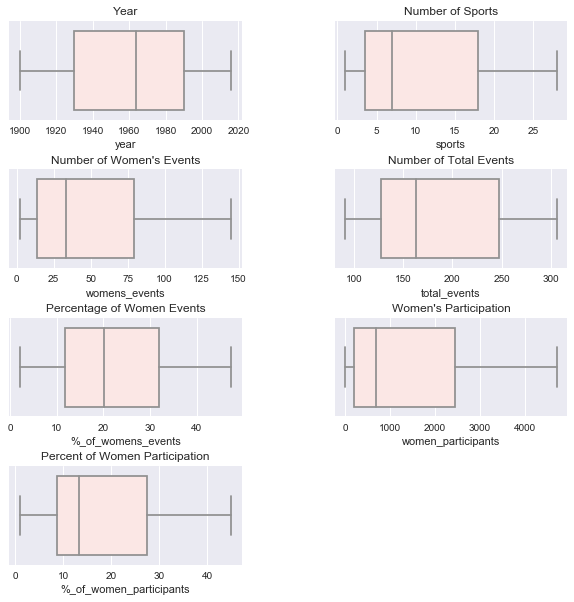

In [1081]:
#Creating figure
plt.style.use('seaborn')
fig, axis = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

# plot 1
sns.boxplot(y, color = 'mistyrose', ax = axis[0,0]).set_title('Year')
# plot 2
sns.boxplot(s, color = 'mistyrose', ax = axis[0,1]).set_title('Number of Sports')
# plot 3
sns.boxplot(we, color = 'mistyrose', ax = axis[1,0]).set_title("Number of Women's Events")
# plot 4
sns.boxplot(te, color = 'mistyrose', ax = axis[1,1]).set_title('Number of Total Events')
# plot 5
sns.boxplot(pwe, color = 'mistyrose', ax = axis[2,0]).set_title('Percentage of Women Events')
# plot 6
sns.boxplot(wp, color = 'mistyrose', ax = axis[2,1]).set_title("Women's Participation")
# plot 7
sns.boxplot(pwp, color = 'mistyrose', ax = axis[3,0]).set_title('Percent of Women Participation')

ax = axis[3,1].set_visible(False)

Text(0.5, 1.0, 'Percentage of Women Participation vs. Year')

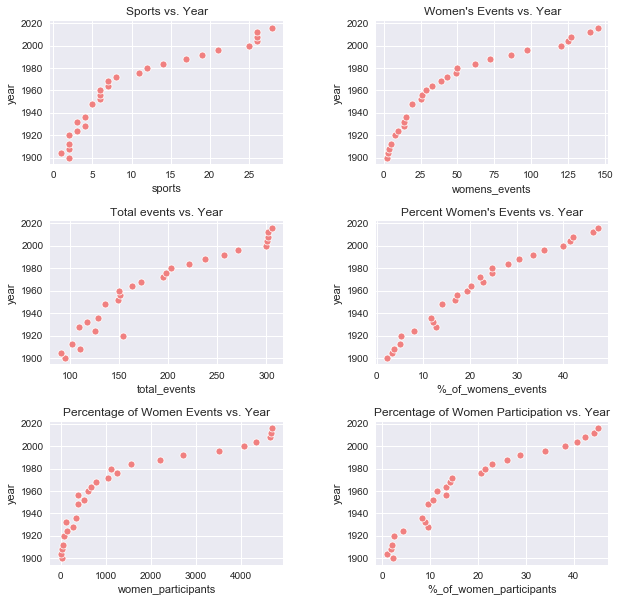

In [1082]:
#Creating figure
fig, axis = plt.subplots(nrows = 3, ncols = 2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

# plot 1
sns.scatterplot(x = olympic_raw['sports'], y = olympic_raw['year'], color = 'lightcoral', ax = axis[0,0]).set_title('Sports vs. Year')
# plot 2
sns.scatterplot(x = olympic_raw['womens_events'], y = olympic_raw['year'], color = 'lightcoral', ax = axis[0,1]).set_title("Women's Events vs. Year")
# plot 3
sns.scatterplot(x = olympic_raw['total_events'], y = olympic_raw['year'], color = 'lightcoral', ax = axis[1,0]).set_title("Total events vs. Year")
# plot 4
sns.scatterplot(x = olympic_raw['%_of_womens_events'], y = olympic_raw['year'], color = 'lightcoral', ax = axis[1,1]).set_title("Percent Women's Events vs. Year")
# plot 5
sns.scatterplot(x = olympic_raw['women_participants'], y = olympic_raw['year'], color = 'lightcoral', ax = axis[2,0]).set_title('Percentage of Women Events vs. Year')
# plot 6
sns.scatterplot(x = olympic_raw['%_of_women_participants'], y = olympic_raw['year'], color = 'lightcoral', ax = axis[2,1]).set_title("Percentage of Women Participation vs. Year")


Between boxplots and the scatterplots, visually we can conclude there are no outliers that needs further analysis. All values should be included.

## Histograms of Each 

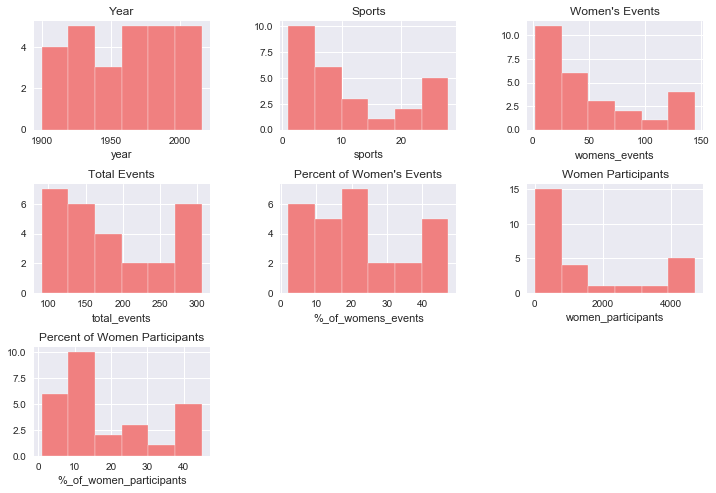

In [1083]:
#Creating figure
fig, axis = plt.subplots(nrows = 3, ncols = 3)
fig.set_size_inches(12,8)
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

# plot 1
sns.distplot(olympic_raw['year'], color = 'lightcoral', ax = axis[0,0], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title('Year')
# plot 2
sns.distplot(olympic_raw['sports'], color = 'lightcoral', ax = axis[0,1], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title('Sports')
# plot 3
sns.distplot(olympic_raw['womens_events'], color = 'lightcoral', ax = axis[0,2], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title("Women's Events")
# plot 4
sns.distplot(olympic_raw['total_events'], color = 'lightcoral', ax = axis[1,0], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title('Total Events')
# plot 5
sns.distplot(olympic_raw['%_of_womens_events'], color = 'lightcoral', ax = axis[1,1], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title("Percent of Women's Events")
# plot 6
sns.distplot(olympic_raw['women_participants'], color = 'lightcoral', ax = axis[1,2], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title('Women Participants')
# plot 7
sns.distplot(olympic_raw['%_of_women_participants'], color = 'lightcoral', ax = axis[2,0], bins = 6, kde = False, hist_kws=dict(alpha=1)).set_title('Percent of Women Participants')

ax = axis[2,1].set_visible(False)
ax = axis[2,2].set_visible(False)

Many of the histograms present right skewed distributions. This could suggest that the prevalence of women in the Olympics has only recently increased dramatically.

## Comparing Variables

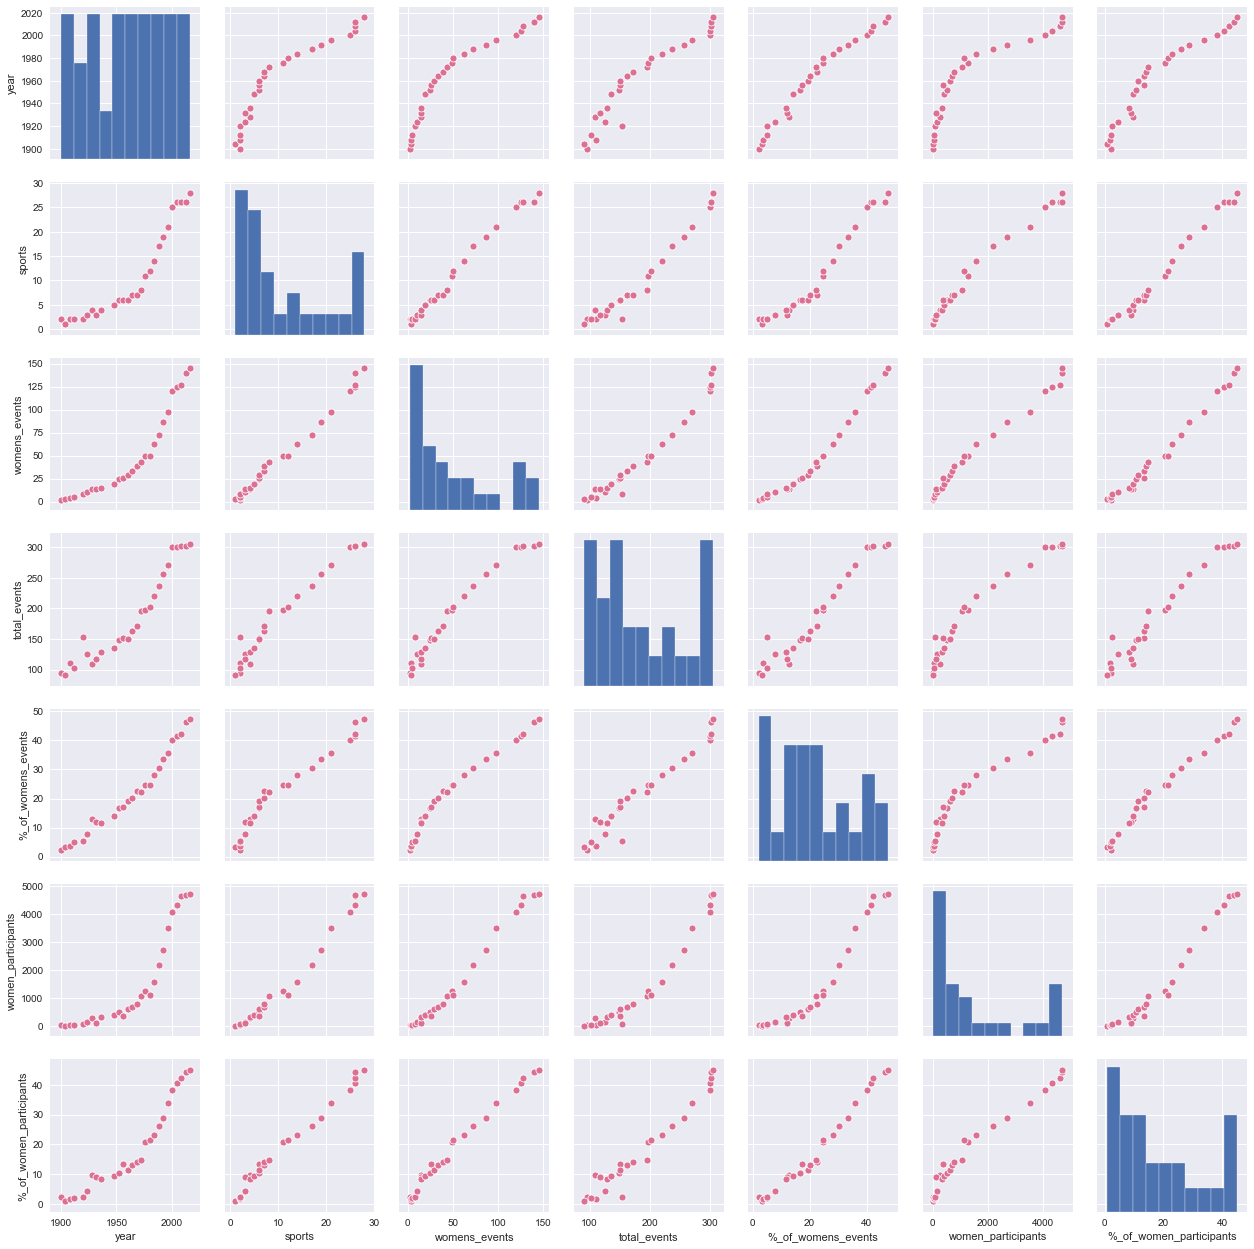

In [1084]:
sns.pairplot(olympic_raw, plot_kws = {'color':'palevioletred'})

Using the pairwise plots, it appears that all the variables have somewhat of a positive relationship with one another. Further analysis is required to conclude this.

## Two Examples of PMF

### Example One: Number of women participants before women in IOC (1981) vs. after

In [1092]:
preioc = olympic_raw[olympic_raw.year < 1981]
postioc = olympic_raw[olympic_raw.year >= 1981]
prewp_pmf = thinkstats2.Pmf(preioc.women_participants, label='Preioc')
pstwp_pmf = thinkstats2.Pmf(postioc.women_participants, label='Postioc')

In [1087]:
prewp_pmf.Total()

1.0000000000000002

In [1088]:
pstwp_pmf.Total()

1.0000000000000002

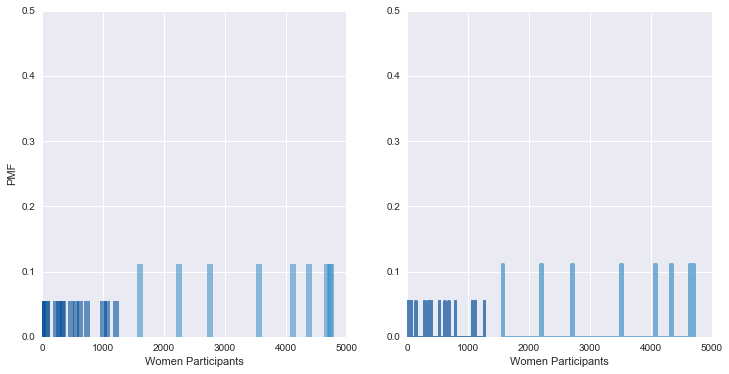

In [1089]:
width = 4
axis = [0,5000,0,0.5]
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(prewp_pmf, align = 'right', width = 100)
thinkplot.Hist(pstwp_pmf, align = 'left', width = 100)
thinkplot.Config(xlabel = 'Women Participants', ylabel = "PMF", axis = axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([prewp_pmf, pstwp_pmf])
thinkplot.Config(xlabel = 'Women Participants', axis = axis)

Since each year the women participation was a different number, the PMF does not look linear. If there were certain values that multiple obervations lied, the PMF would increase. One thing that is depicted here is the difference in participation between the Preioc time frame and Postioc time frame. The Preioc obervations are bunched together at the low end of the x-axis, meaning there was not a lot of growth in women participation over the years. After women were included in the IOC, a rapid growth per Olympics is oberved with a much larger spread between observations.

### Example Two: Percent of women's events before women in IOC (1981) vs. after

In [1093]:
preiocpwe = preioc['%_of_women_participants']
pstiocpwe = postioc['%_of_women_participants']
prepwe_pmf = thinkstats2.Pmf(preiocpwe, label='Preioc')
pstpwe_pmf = thinkstats2.Pmf(pstiocpwe, label='Postioc')

In [1094]:
prepwe_pmf.Total()

1.0000000000000002

In [1095]:
pstpwe_pmf.Total()

1.0000000000000002

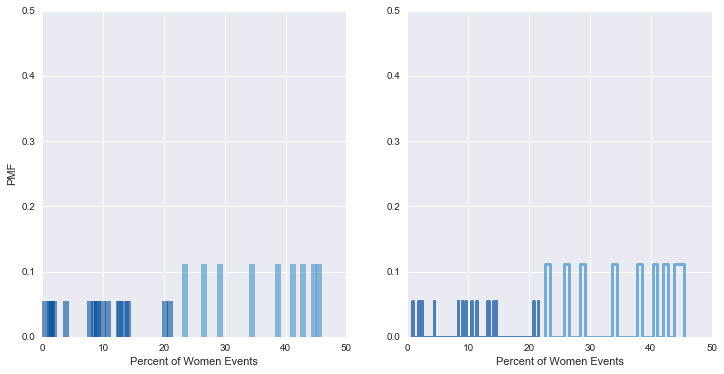

In [1096]:
width = 4
axis = [0,50,0,0.5]
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(prepwe_pmf, align = 'right', width = 1)
thinkplot.Hist(pstpwe_pmf, align = 'left', width = 1)
thinkplot.Config(xlabel = 'Percent of Women Events', ylabel = "PMF", axis = axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([prepwe_pmf, pstpwe_pmf])
thinkplot.Config(xlabel = 'Percent of Women Events', axis = axis)

In this second example we see a similar trend as the first example. The spread is slightly larger for Preioc percentages of events, however it is still larger on the Postioc side. The spread between bars for the Postioc observations are not as extreme as the participants. This could be a result of the percentage, more total events are being added that keeps the percentage of womens events lower. 

## Create CDF

In [1097]:
preioc = olympic_raw[olympic_raw.year < 1981]
postioc = olympic_raw[olympic_raw.year >= 1981]

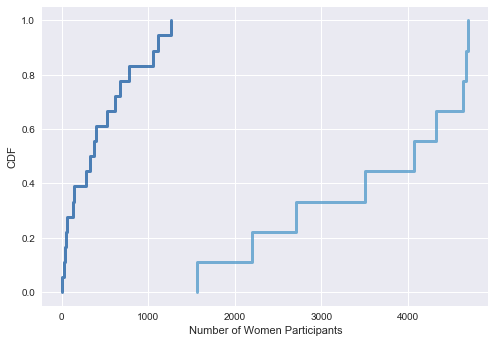

In [1098]:
preioc_cdf = thinkstats2.Cdf(preioc.women_participants, label='Preioc')
postioc_cdf = thinkstats2.Cdf(postioc.women_participants, label='Postioc')

thinkplot.PrePlot(2)
thinkplot.Cdfs([preioc_cdf, postioc_cdf])
thinkplot.Config(xlabel='Number of Women Participants', ylabel='CDF')

In [1099]:
prepwp = preioc['%_of_women_participants']
pstpwp = postioc['%_of_women_participants']

In [1100]:
median = preioc_cdf.Percentile(50)
median

331

In [1101]:
iqr = (preioc_cdf.Percentile(25), preioc_cdf.Percentile(75))
iqr

(63, 678)

In [1102]:
median = postioc_cdf.Percentile(50)
median

4069

In [1103]:
iqr = (postioc_cdf.Percentile(25), postioc_cdf.Percentile(75))
iqr

(2707, 4637)

The two different CDF's show very different distributions. Before 1981, there was more vertical space covered over a smaller amount of space on the x axis. After 1981, there is a much larger horizonal movement than vertial movement.

### Analytical Distributions

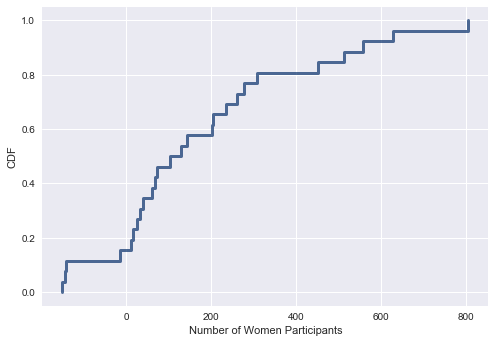

In [1104]:
diffs = olympic_raw.women_participants.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of Women Participants', ylabel='CDF')

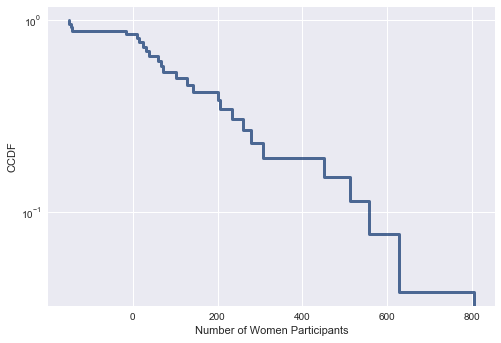

<Figure size 576x432 with 0 Axes>

In [1105]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Number of Women Participants',
                ylabel='CCDF',
                yscale='log')

In [1106]:
xs, ys = thinkstats2.NormalProbability(olympic_raw.women_participants)

In [1107]:
def MakeNormalPlot(participants):
    mean = participants.mean()
    std = participants.std()
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(participants)
    thinkplot.Plot(xs, ys, label='Number of Women Participants')


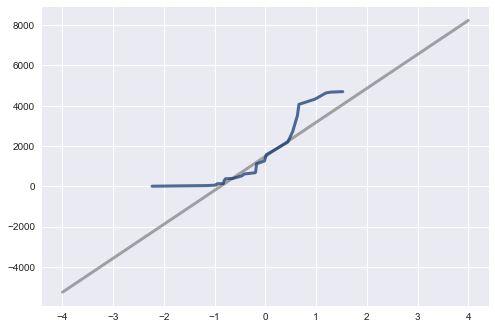

In [1108]:
MakeNormalPlot(olympic_raw.women_participants)

In [1109]:
def MakeLogPlot(participants):
    mean = participants.mean()
    std = participants.std()
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(participants)
    thinkplot.Plot(xs, ys, label='Number of Women Participants')

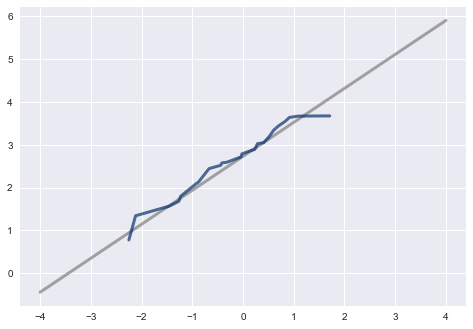

In [1110]:
MakeLogPlot(np.log10(olympic_raw.women_participants))

When comparing the results from the exponential distribution to the normal plots, it is obvious that the normal plots are not the correct distributions. Since the CCDF of the exponential distribution is almost a straight line, that distribution is best.

## Scatterplots

### Women Events and Percentage of Women Participation

Text(0, 0.5, 'Percentage of Women Participants')

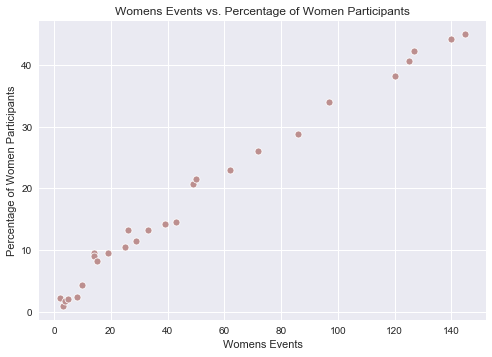

In [1111]:
sns.scatterplot(x = olympic_raw['womens_events'], y = olympic_raw['%_of_women_participants'], color = 'rosybrown')
plt.title('Womens Events vs. Percentage of Women Participants')
plt.xlabel('Womens Events')
plt.ylabel('Percentage of Women Participants')

In [1112]:
we = olympic_raw['womens_events']
pwp = olympic_raw['%_of_women_participants']

#### Correlation and Covariance

In [1113]:
# This is the parametric test

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx = np.mean(xs)
    varx = np.var(xs)
    meany = np.mean(ys)
    vary = np.var(ys)
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)

    return corr

Corr(we,pwp)

0.9920775067749413

In [1114]:
# Non-Parametric test

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

SpearmanCorr(we,pwp)

0.9909937529593699

In [1115]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Cov(we,pwp)

641.9991769547325

We can conclude that womes events and percent of women participants have a very strong positive relationship from the correlation and covariance. Spearman's Rank correlation was performed as a result of the non-normal distribution in histograms, however, in this instance there was no difference. 

### Woman Participants per Year

Text(0, 0.5, 'Year')

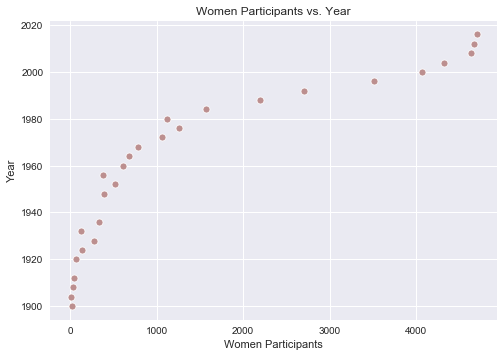

In [1116]:
sns.scatterplot(x = olympic_raw['women_participants'], y = olympic_raw['year'], color = 'rosybrown')
plt.title('Women Participants vs. Year')
plt.xlabel('Women Participants')
plt.ylabel('Year')

In [1117]:
wp = olympic_raw['women_participants']
y = olympic_raw['year']

#### Correlation and Covariance

In [1118]:
# This is the parametric test
Corr(wp,y)

0.880107594419732

In [1119]:
# This is the non-parametric test
SpearmanCorr(wp,y)

0.9951159951159952

In [1120]:
Cov(wp,y)

51282.68312757202

When comparing number of women participants and the year, there is also a very strong, positive relationship. Again, since the histograms displayed a non-normal, right skewed distribution for women participants, Spearman's Rank correlation was also performed. In this analysis, it was important to perform both parametric and non-parametric tests for correlation since the Spearman's Rank relsulted in a correlation a tenth stronger than the Pearson's correlation.

## Hypothesis Test

The question I have been interested in and testing throughout this is whether the involvment of women in the Olympics has changed since women have been added to the International Olympic Committee. The first women was added to the committee in 1981.

### Women's Events

$H_{0}$: $\mu_{Pre}$ = $\mu_{Post}$

$H_{A}$: $\mu_{Pre}$ $\neq$ $\mu_{Post}$

In [1123]:
preioc = olympic_raw[olympic_raw.year < 1981]
postioc = olympic_raw[olympic_raw.year >= 1981]

In [1124]:
preiocwp = preioc.women_participants.values
postiocwp = postioc.women_participants.values

In [1125]:
preiocwp, postiocwp

(array([  22,    6,   37,   48,   63,  135,  277,  126,  331,  390,  519,
         376,  611,  678,  781, 1059, 1260, 1115], dtype=int64),
 array([1566, 2194, 2707, 3512, 4069, 4329, 4637, 4676, 4700], dtype=int64))

In [1126]:
ioc = (preiocwp, postiocwp)
ioc

(array([  22,    6,   37,   48,   63,  135,  277,  126,  331,  390,  519,
         376,  611,  678,  781, 1059, 1260, 1115], dtype=int64),
 array([1566, 2194, 2707, 3512, 4069, 4329, 4637, 4676, 4700], dtype=int64))

In [1127]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [1128]:
class DiffMeansOneSided(DiffMeansPermute):
    """Tests a one-sided difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [1129]:
class DiffStdPermute(DiffMeansPermute):
    """Tests a one-sided difference in standard deviation by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [1130]:
def PrintTest(p_value, ht):
    """Prints results from a hypothesis test.

    p_value: float
    ht: HypothesisTest
    """
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())
    
def RunTests(data, iters=1000):
    """Runs several tests on the given data.

    data: pair of sequences
    iters: number of iterations to run
    """

    # test the difference in means
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=iters)
    print('\nmeans permute two-sided')
    PrintTest(p_value, ht)

    ht.PlotCdf()
    thinkplot.Save(root='hypothesis1',
                   title='Permutation test',
                   xlabel='difference in means (weeks)',
                   ylabel='CDF',
                   legend=False) 
    
    # test the difference in means one-sided
    ht = DiffMeansOneSided(data)
    p_value = ht.PValue(iters=iters)
    print('\nmeans permute one-sided')
    PrintTest(p_value, ht)

    # test the difference in std
    ht = DiffStdPermute(data)
    p_value = ht.PValue(iters=iters)
    print('\nstd permute one-sided')
    PrintTest(p_value, ht)

In [1131]:
RunTests(ioc)


means permute two-sided
p-value = 0.0
actual = 3163.6666666666665
ts max = 3008.0
Writing hypothesis1.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Writing hypothesis1.eps

means permute one-sided
p-value = 1.0
actual = -3163.6666666666665
ts max = 1883.5000000000002

std permute one-sided
p-value = 0.985
actual = -718.4502205794927
ts max = 1507.4189678597763


<Figure size 576x432 with 0 Axes>

Some code was used from Allen Downey's Think Stats. Difficulties in running the appropriate hypothesis test resulted in trying the RunTests function which ran multiple types of hypothesis test. With the alternative hypothesis in mind, we are looking for the two-tailed test, since we are just looking for a difference in mean between groups. With a p-value of less than 0.0 we can conclude that the null hypothesis is rejected. 

## Regression Analysis

In [1132]:
olym = olympic_raw.dropna(subset=['year', 'women_participants'])
y, wp = olym.year, olym.women_participants
log_wp = np.log10(wp)

In [1133]:
inter, slope = thinkstats2.LeastSquares(y, wp)
inter, slope

(-79617.09119073751, 41.36542240555181)

In [1134]:
inter, slope = thinkstats2.LeastSquares(y, log_wp)
inter, slope

(-39.192225648849096, 0.021380515697654555)

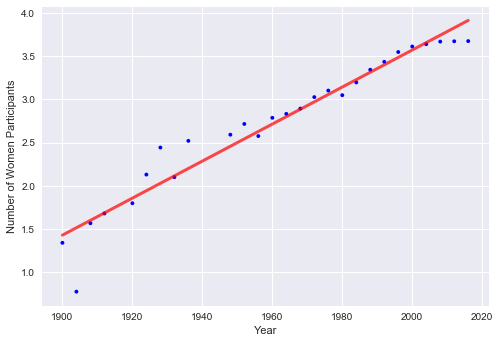

In [1135]:
thinkplot.Scatter(y, log_wp, alpha=1, s=15)
fxs, fys = thinkstats2.FitLine(y, inter, slope)
thinkplot.Plot(fxs, fys, color='red')
thinkplot.Config(xlabel='Year', ylabel='Number of Women Participants', legend=False)

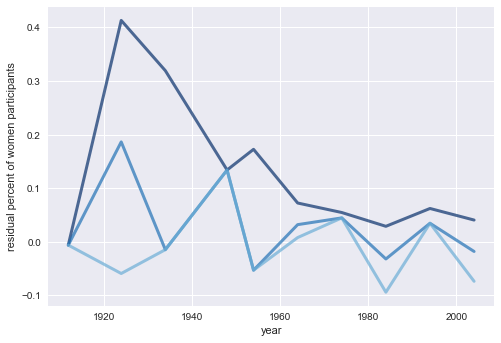

In [1136]:
res = thinkstats2.Residuals(y, log_wp,inter,slope)
olym['residual'] = res

bins = np.arange(1900, 2020, 10)
indices = np.digitize(y, bins)
groups = olym.groupby(indices)

means = [group.year.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    ys = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(means, ys, label=label)
    
thinkplot.Config(xlabel='year', ylabel='residual percent of women participants', legend=False)

In [1137]:
rho = thinkstats2.Corr(y, log_wp)
r2 = thinkstats2.CoefDetermination(log_wp, res)
rho, r2

(0.9679181509773226, 0.9368655469913594)

In [1138]:
rho**2 - r2

-3.3306690738754696e-16

In [1139]:
RMSE_noyr = thinkstats2.Std(log_wp)
RMSE_noyr

0.7777610322079787

In [1140]:
RMSE_yr = thinkstats2.Std(res)
RMSE_yr

0.19542467175695216

In [1141]:
1 - RMSE_yr / RMSE_noyr

0.7487342979858957

In [1142]:
t = []
for _ in range(100):
    sample = thinkstats2.ResampleRows(olym)
    estimates = thinkstats2.LeastSquares(sample.year, np.log10(sample.women_participants))
    t.append(estimates)

inters, slopes = zip(*t)

{'xscale': 'linear', 'yscale': 'linear'}

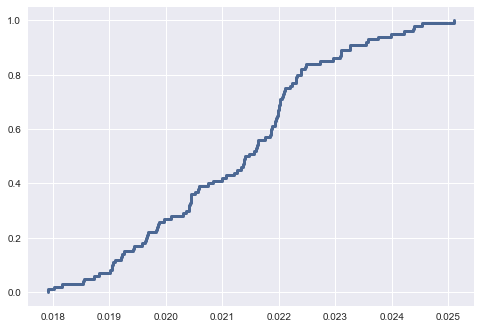

In [1143]:
cdf = thinkstats2.Cdf(slopes)
thinkplot.Cdf(cdf)

In [1144]:
pvalue = cdf[0]
mean = thinkstats2.Mean(slopes)
stderr = thinkstats2.Std(slopes)
ci = cdf.Percentile(5), cdf.Percentile(95)
mean, pvalue, stderr, ci

(0.021231380132454642,
 0,
 0.0015994295211729595,
 (0.01855282689343079, 0.023990113440664308))